# Regression Practice #

The notebook is for practicing implementing linear and logistic regression models.

In [1]:
# import necessary packages

import pandas as pd
import numpy as np
from sklearn import datasets, model_selection, feature_selection, preprocessing

import sklearn.linear_model as linmodel
import sklearn.metrics as smets

#import statsmodels.api as stmod

import matplotlib.pyplot as plt
import math

## Linear Regression ##

Linear regression estimales a linear relationship between a set of data point to minimize the distance between points and the classification line.

Given a data set of n data points, ${x_{11}, \dotsc, x_{np}}$, with $p$ 
features and set of labels ${y_1, \dotsc, y_n}$.

The model is:

<center>$y_i = \beta_0 + \beta_1x_{11} + \dotsc + \beta_px_{np}$</center>

With $\beta_1, \dotsc, \beta_p$ called the coefficients and $\beta_0$ called the intercept.

The coefficients are fitted to the minimize the sum of square differences between the observed and predicted values.

<center>$\sum_{i=1} (y_i - \hat{y}_i)^2$</center>

#### Data Prcessing ####

Import built-in diabetes data set from scikit-learn. The data set has 442 samples with 10 features. Split the data set into a training and test set.

In [2]:
data = datasets.load_diabetes()
X = data['data']
Y = data['target']
feature_names = data['feature_names']

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, train_size=0.7)

#### Model Creation ####

Create a linear regression model using all features. 
Print model information including coefficients, intercept, and $R^2$ value.
Evaluate using mean squared error on the test set.

In [4]:
model = linmodel.LinearRegression().fit(X_train, Y_train)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print()
rsq = model.score(X_train, Y_train)
print('R-squared:', rsq)
print()

Y_pred = model.predict(X_test)
mse = smets.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [  -22.26814641  -241.42457426   436.67850078   356.08475788
 -1217.1231068    731.7094332    307.02622289   263.88164544
   941.51276238   113.56295229]
Intercept: 154.07044007493036

R-squared: 0.5236615315502134

Mean squared error: 3030.2058457271664


#### Feature Engineering ####

Implement feature selection using SelectKBest() with f_regression() functions to identify the value of each feature. Graph the results to visual which features are useful.

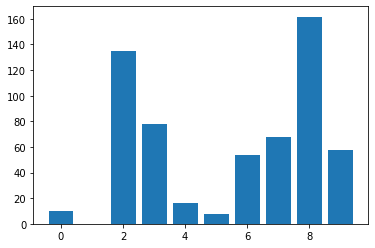

In [5]:
# used to test the output of SelectKBest
#f_st,p_val = feature_selection.f_regression(X_train, Y_train)
#print(f_st)
#print()
#print(p_val)

fit_model = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')
fit_model.fit(X_train, Y_train)
scores = fit_model.scores_

x_ind = np.arange(len(scores))
plt.bar(x_ind, scores)
plt.show()

Based on results, it looks like the best feature is 2, while 8 is also useful. It seems like there are several other useful features, though 1, 5, and 4 are least useful. 

#### Model Creation with Feature Engineering ####

As an arbitrary choice, I will assume adding features 2, 3, 6, 7, 8, 9 as possibly useful for model construction and worthwhile exploring. The number of features that should be used can be viewed as a hyperparameter which can be searched over. 

I will test constructing a model with features, in order of importance by f-statistic and find which offers the best performance on the training data as measured by mean-squared error. When adding a feature to the model, I will continue including the strategies that were deemed more important than it.

In [6]:
# running with subsets of the data will probably be easiest by turning data into dataframe
X_train_df = pd.DataFrame(X_train)

features = [2, 8, 7, 3, 9, 6]
best_sub = [] # best subset of features seen
best_mse = math.inf # best mean_squared error seen

for fi in range(1, len(features)):
    # gather data for features
    curr_feat = features[:fi]
    sub_X = X_train_df[curr_feat]
    if len(curr_feat) == 1:
        sub_X = sub_X.to_numpy().reshape((-1, 1))
        
    # create model and test mse
    sub_model = linmodel.LinearRegression().fit(sub_X, Y_train)
    Y_pred = sub_model.predict(sub_X)
    
    mse = smets.mean_squared_error(Y_train, Y_pred)
    if mse < best_mse:
        best_mse = mse
        best_sub = curr_feat    

print('Best features:', best_sub)

Best features: [2, 8, 7, 3, 9]


Results show that a model with features 2, 3, 7, 8, and 9 demonstrate the best performance on the training data. This also shows my arbitrary choice of cut off point for which features to test was ok, since the wort feature was not deemed useful for the model.

Next, I will construct a model using those features and compare results to the model with all features included when predicting the test set. Note, I could have just used output from the above feature search, but I wanted to separate out the different steps for demonstration purposes.

In [7]:
# make data sets use only necessary features
feats = [2, 3, 7, 8, 9]
new_X_train = X_train_df[feats]
new_X_test = pd.DataFrame(X_test)
new_X_test = new_X_test[feats]

model = linmodel.LinearRegression().fit(new_X_train, Y_train)
rsq = model.score(new_X_train, Y_train)
print('R-squared:', rsq)

Y_pred = model.predict(new_X_test)
mse = smets.mean_squared_error(Y_test, Y_pred)
print('Mean-squared error:', mse)

R-squared: 0.47313327318464626
Mean-squared error: 3003.9242041177


### Observations ###

Model with all features:
R^2: 0.523
MSE: 3126.589

Model with selective features:
R^2: 0.483
MSE: 3278.244

Data shows that with feature selection, model performance on the test set actually degrades slightly (lower R^2 and a higher MSE). It may be that the feature selected model is overfitting slightly. This data set is rather small (train set has ~309 and testing 


#### Second example using the California Housing data set. ####

---------------------------
All features:
--R-squared: 0.6070522363613844
--MSE: 0.5287987809209836
---------------------------


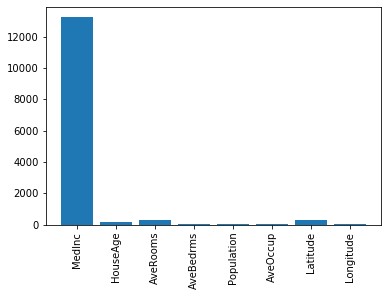

---------------------------
All features:
--R-squared: 0.47786963577496133
--MSE: 0.7165600593210025
---------------------------


In [8]:
# test the above using a different data set
data = datasets.fetch_california_housing(as_frame=True)
fnames = data['feature_names']
X = data['data']
Y = data['target']

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, train_size=0.7)

# construct model with all data
model = linmodel.LinearRegression().fit(X_train, Y_train)
rsq = model.score(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = smets.mean_squared_error(Y_test, Y_pred)
print('---------------------------')
print('All features:')
print('--R-squared:', rsq)
print('--MSE:', mse)
print('---------------------------')

# perform feature selection
fmodel = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')
fmodel.fit(X_train, Y_train)
scores = fmodel.scores_

plt.bar(fnames, scores)
plt.xticks(rotation=90)
plt.show()

# create model using top features
new_X_train = X_train[['MedInc']]
new_X_test = X_test[['MedInc']]

model = linmodel.LinearRegression().fit(new_X_train, Y_train)
rsq = model.score(new_X_train, Y_train)
Y_pred = model.predict(new_X_test)
mse = smets.mean_squared_error(Y_test, Y_pred)
print('---------------------------')
print('All features:')
print('--R-squared:', rsq)
print('--MSE:', mse)
print('---------------------------')

Similarly finding that feature selection is showing slightly degraded performance. Think in both cases, while there's not as much information coming from the other features, they are still signaling something of use for the model.

## Logistic Regression ##

Logistics regression uses the linear regression model to a classification task. The output from the linear regression model, $\hat{y}$, is used to calculate the probability of belonging to class 0 or 1 using the sigmoid function.

<center>$p(\hat{y}' = 0) = \frac{1}{1-e^{-\hat{y}}}$</center>
<center>$p(\hat{y}' = 1) = 1 - p(\hat{y})$</center>

#### Data Processing ####

Import the scikit-learn built-in cancer data set, which as 2 classes (Maignant: 212 samples and Benign: 357 samples). There are 30 features. The data is partitioned into training and testing sets.

In [9]:
data = datasets.load_breast_cancer()
X = data['data']
Y = data['target']
fnames = data['feature_names']
print('Features:', fnames)

# apply normalization to fix logistic regression over stopping iterations
X = preprocessing.Normalizer().fit_transform(X, Y)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, Y, train_size=0.7)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Create a logistic regression model using all the features.

In [10]:
model = linmodel.LogisticRegression(max_iter=100).fit(X_train, Y_train)
Y_pred = model.predict(X_test)

acc = model.score(X_test, Y_test)
print('Accuracy:', acc)
prec = smets.precision_score(Y_test, Y_pred)
print('Precision:', prec)
recall = smets.recall_score(Y_test, Y_pred)
print('Recall:', recall)
f1 = smets.f1_score(Y_test, Y_pred)
print('F1 score:', f1)

Accuracy: 0.6842105263157895
Precision: 0.6447368421052632
Recall: 1.0
F1 score: 0.7839999999999999


#### Analysis ####

The recall results show the model is very good at identifying the truely malignant cases. However, the precision results show there are a handful of benign cases that have erronously been labeled as malignant. These results are reflected in the F1 score as well.

#### Multinomial Logistic Regression Note ####

This examples is a binary case. However, logistic regression can also be used for $K > 2$ classes. In this case, $K$ binary logistic regression models are created and a softmax function is used instead to calculate the probability of belonging to a given class, $k$.

<center>$p(\hat{y}' = k) = \frac{e^{\hat{y}_k}}{1 + \sum_{j=1}^{K} e^{\hat{y}_j}}$</center>